Projeto de Transfer Learning em Python 
===============
O projeto consiste em aplicar o método de Transfer Learning em uma rede de Deep Learning na linguagem Python no ambiente COLAB.  

Para exemplo, utilizaremos o seguinte projeto que realiza Transfer Learning com o Dataset do MNIST: 
https://colab.research.google.com/github/kylemath/ml4a-guides/blob/master/notebooks/transfer-learning.ipynb 

O dataset utilizado engloba duas classes: gatos e cachorros. Uma descrição da base de dados pode ser visualizada neste link: https://www.tensorflow.org/datasets/catalog/cats_vs_dogs. 

Já o dataset para download pode ser acessado por meio deste outro link:

https://www.microsoft.com/en-us/download/details.aspx?id=54765. 

 

Observações: Neste projeto, você pode usar sua própria base de dados (exemplo: fotos suas, dos seus pais, dos seus amigos, dos seus animais domésticos, etc), o exemplo de gatos e cachorros, pode ser substituído por duas outras classes do seu interesse. 
O Dataset criado em nosso projeto anterior, pode ser utilizado agora.  

O projeto deve ser enviado para o GitHub da DIO: https://github.com/digitalinnovationone.

Instale as bibliotecas necessárias:
===============
O comando abaixo instala as bibliotecas: tensorflow, numpy e matplotlib

In [16]:
%pip install tensorflow numpy matplotlib

Importe as bibliotecas essenciais
===============
1. TensorFlow: usado para construir, treinar e avaliar modelos de redes neurais, incluindo aprendizado de transferência com modelos pré-treinados.
2. NumPy: Usado para pré-processamento de dados, manipulação e manipulação de matrizes numéricas, que são comumente usadas em aprendizado de máquina.
3. Matplotlib: usado para visualizar dados, incluindo imagens, métricas de desempenho do modelo e histórico de treinamento.

In [16]:
try:
    import os
    #import shutil
    import numpy as np
    import matplotlib.pyplot as plt
    import tensorflow as tf
    from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
    from sklearn.model_selection import train_test_split
except ImportError as e:
    print(f"Error occurred while importing modules: {e}")

Carregue e pré-processe os dados:
===============
A seguir, baixe o conjunto de dados "cats_vs_dogs" e pré-processe-o. 
Divida os dados em conjuntos de treinamento e validação:

In [3]:
# Baixe e extraia o conjunto de dados
url = 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip'
default_dir = os.getcwd()
print(default_dir)
data_file = tf.keras.utils.get_file('cats_vs_dogs.zip', origin = url, cache_dir = default_dir, extract = True) 

824887076/824887076 [==============================] - 142s 0us/step


In [8]:
# Caminhos para os diretórios Cat e Dog
cat_dir = os.path.join(default_dir, 'datasets', 'PetImages', 'Cat')
dog_dir = os.path.join(default_dir, 'datasets', 'PetImages', 'Dog')

# Cria listas contendo os caminhos completos para os arquivos individuais de imagens dentro dos diretórios Cat e Dog.
cat_images = [os.path.join(cat_dir, filename) for filename in os.listdir(cat_dir)]
dog_images = [os.path.join(dog_dir, filename) for filename in os.listdir(dog_dir)]

In [9]:
# Separa train_test_split em duas listas: train_???_images e validation_???_images
train_cat_images, validation_cat_images = train_test_split(cat_images, test_size=0.2, random_state=42)
train_dog_images, validation_dog_images = train_test_split(dog_images, test_size=0.2, random_state=42)

print(f"Number of training cat images: {len(train_cat_images)}")
print(f"Number of validation cat images: {len(validation_cat_images)}")
print(f"Number of training dog images: {len(train_dog_images)}")
print(f"Number of validation dog images: {len(validation_dog_images)}")

Number of training cat images: 10000
Number of validation cat images: 2501
Number of training dog images: 10000
Number of validation dog images: 2501


In [18]:
# Preprocessing parameters
image_size = (224, 224)

# Load and preprocess cat images for training
#train_cat_images = [os.path.join(cat_dir, filename) for filename in train_cat_images]
train_cat_data = [img_to_array(load_img(img, target_size=image_size)) / 255.0 for img in train_cat_images]
train_cat_labels = np.zeros(len(train_cat_images))  # Cat label is 0

# Load and preprocess cat images for validation
#validation_cat_images = [os.path.join(cat_dir, filename) for filename in validation_cat_images]
validation_cat_data = [img_to_array(load_img(img, target_size=image_size)) / 255.0 for img in validation_cat_images]
validation_cat_labels = np.zeros(len(validation_cat_images))  # Cat label is 0

# Load and preprocess dog images for training
#train_dog_images = [os.path.join(dog_dir, filename) for filename in train_dog_images]
train_dog_data = [img_to_array(load_img(img, target_size=image_size)) / 255.0 for img in train_dog_images]
train_dog_labels = np.ones(len(train_dog_images))  # Dog label is 1

# Load and preprocess dog images for validation
#validation_dog_images = [os.path.join(dog_dir, filename) for filename in validation_dog_images]
validation_dog_data = [img_to_array(load_img(img, target_size=image_size)) / 255.0 for img in validation_dog_images]
validation_dog_labels = np.ones(len(validation_dog_images))  # Dog label is 1

# Combine cat and dog data and labels
train_data = np.concatenate((train_cat_data, train_dog_data))
train_labels = np.concatenate((train_cat_labels, train_dog_labels))
validation_data = np.concatenate((validation_cat_data, validation_dog_data))
validation_labels = np.concatenate((validation_cat_labels, validation_dog_labels))

# Now you can use train_data, train_labels, validation_data, and validation_labels for model training


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001ECFF7062F0>

In [15]:
# Cria geradores de dados para pré-processar imagens
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator_cat = train_datagen.flow_from_directory(
    cat_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',  # Use train_cat_images for training
    shuffle=True,
    seed=42
)

validation_generator_cat = validation_datagen.flow_from_directory(
    cat_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',  # Use validation_cat_images for validation
    shuffle=False
)

train_generator_dog = train_datagen.flow_from_directory(
    dog_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',  # Use train_dog_images for training
    shuffle=True,
    seed=42
)

validation_generator_dog = validation_datagen.flow_from_directory(
    dog_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',  # Use validation_dog_images for validation
    shuffle=False
)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [10]:
# Preprocess data
batch_size = 32
image_size = (128, 128)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


NameError: name 'train_dir' is not defined

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import ResNet50
print(keras.__version__)

2.10.0


In [20]:
import urllib.request
import requests
import zipfile

# Download da base de dados
url = 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip'
r = requests.get(url, allow_redirects=True)
open('catsdogsdb.zip', 'wb').write(r.content)

# Extração dos arquivos
archive = zipfile.ZipFile('catsdogsdb.zip', 'r')
filepath = [i for i in archive.namelist() if i.startswith('PetImages') ]

for file in filepath:
    archive.extract(file)

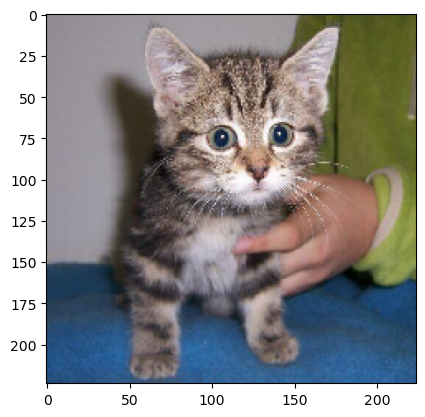

In [2]:
from keras.preprocessing import image
from matplotlib import pyplot as plt
sample_image = keras.preprocessing.image.load_img(
    'PetImages/Cat/5014.jpg',
    target_size=(224, 224)
)
plt.imshow(sample_image)

In [2]:
# https://keras.io/api/
# https://github.com/guilhermedom/resnet50-transfer-learning-cats-and-dogs/blob/main/notebooks/1.0-gdfs-resnet50-transfer-learning-cats-and-dogs.ipynb


2.10.0


Base de Dados\n
*Baixar a base de dados\n
*Descompactar e acessar diretório

In [3]:
import numpy as np
sample_image = np.array(sample_image)
sample_image = np.expand_dims(sample_image, axis=0)
print(sample_image.shape)

(1, 224, 224, 3)


In [4]:
sample_image = keras.applications.resnet50.preprocess_input(sample_image)
print("Maximum pixel value in image after ResNet-50 normalization: ",
      sample_image.max())
print("Minimum pixel value in image after ResNet-50 normalization: ",
      sample_image.min())

Maximum pixel value in image after ResNet-50 normalization:  151.061
Minimum pixel value in image after ResNet-50 normalization:  -123.68


Definindo o modelo

In [5]:
base_model = keras.applications.ResNet50(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)
base_model.trainable = False
base_model.summary()

: 

: 

In [25]:
prediction = base_model.predict(sample_image)
print("Prediction: ",
      keras.applications.resnet50.decode_predictions(prediction, top=5))

NameError: name 'base_model' is not defined

In [ ]:
from matplotlib import pyplot as plt

sample_image = keras.preprocessing.image.load_img(
    images[i], 
    target_size=(224, 224) for i in range(12499)
)
plt.imshow(sample_image)


SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2602538645.py, line 5)

In [19]:
base_model.input_4

AttributeError: 'Functional' object has no attribute 'InputLayer'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from keras.models import Model
#from keras.layers import Dense
# https://napsterinblue.github.io/notes/machine_learning/computer_vision/fine_tuning_conv_nets/